In [1]:
import sys
sys.path.append('python/')
import monkdata as m
from dtree import entropy, averageGain
import matplotlib.pyplot as plt
import numpy as np
import statistics

## Assignment 0: Which one is the most difficult? 

Monk3 will be the most difficult, because it has noise. Since decision trees have high variance and low bias the accuracy of the model goes down quickly when there is noise because the model will accurately model the noise. It also has the least training data. The noise problem can be solved with pruning, as we'll see later on.

The Monk2 dataset will have the more complex tree however, as it has to check all the attributes for whether they fulfill the condition. This is not true for monk1 and monk3. This also means that information gain is less usefull for this data set, because all the attributes give or take give the same information gain (slight variation because of amount of values an attribute can have and the specific training data.)

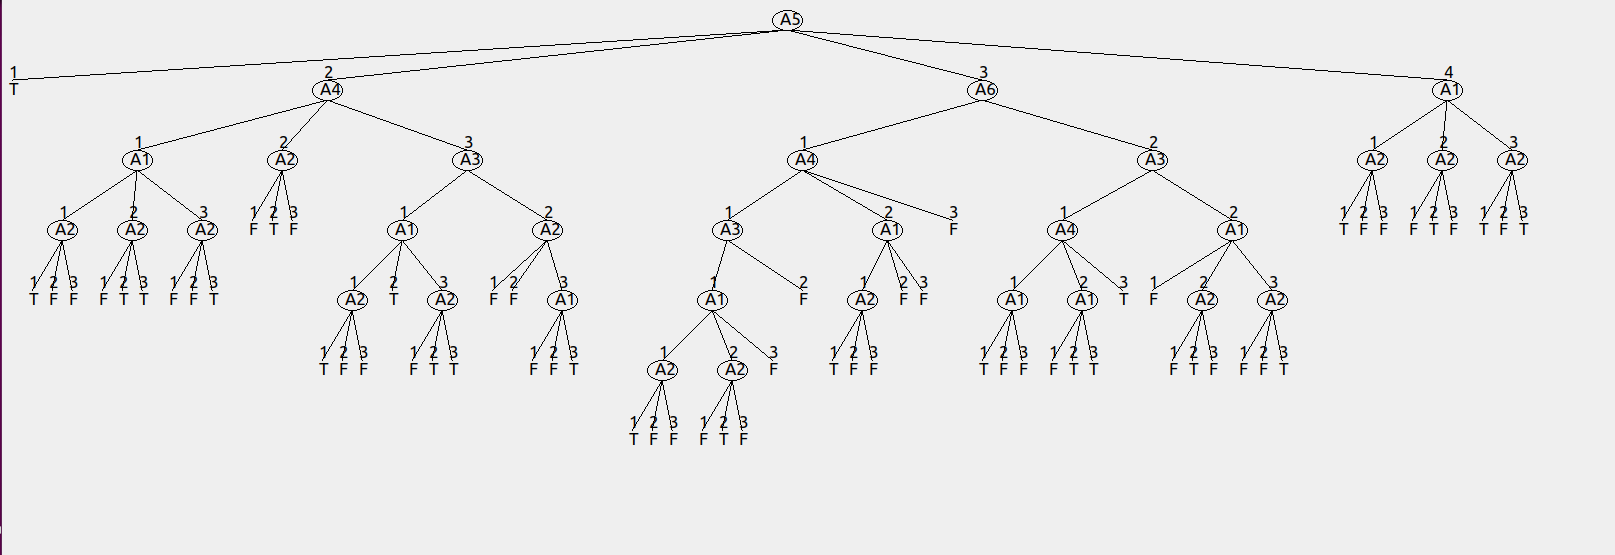

In [109]:
from IPython.display import Image
Image(filename =  "Tree1.png")

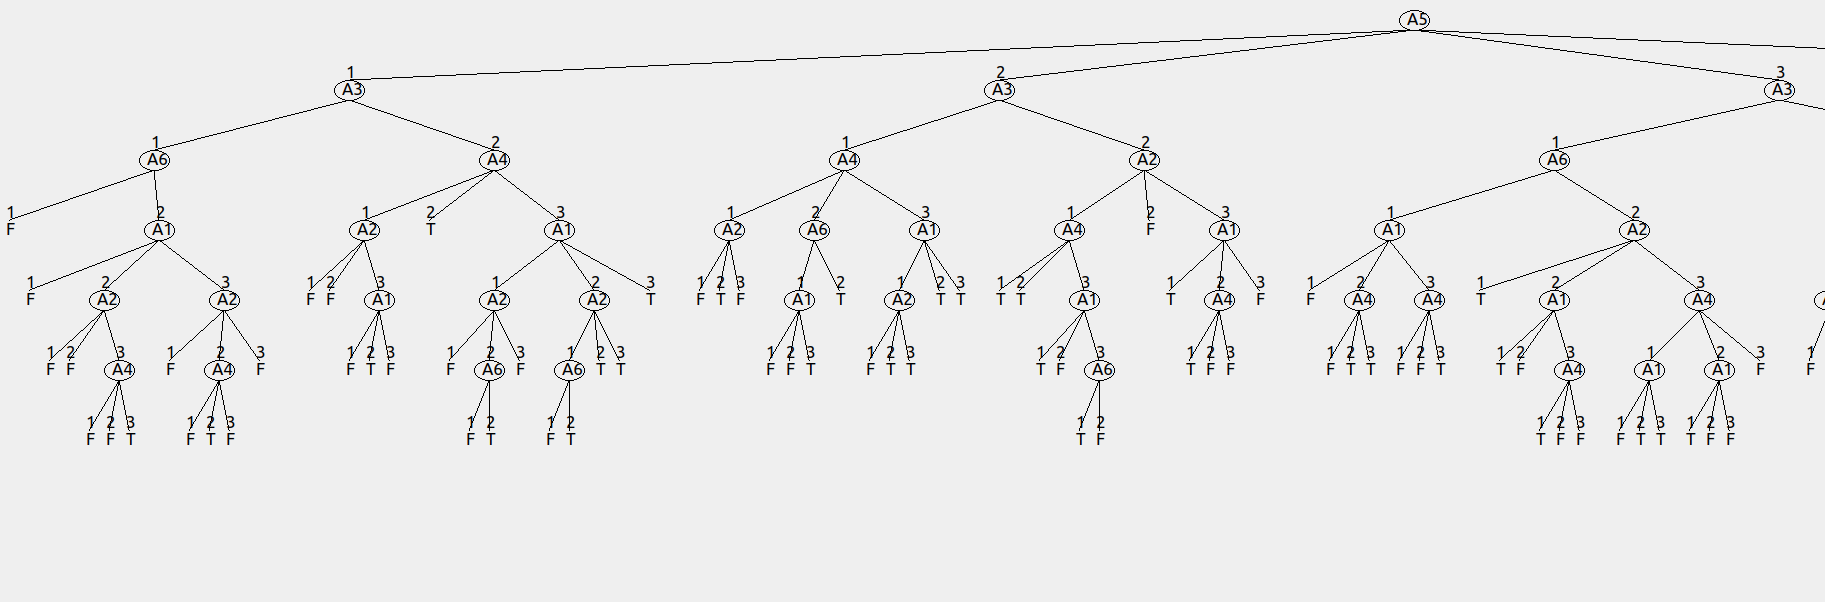

In [110]:
Image(filename =  "Tree2.png")

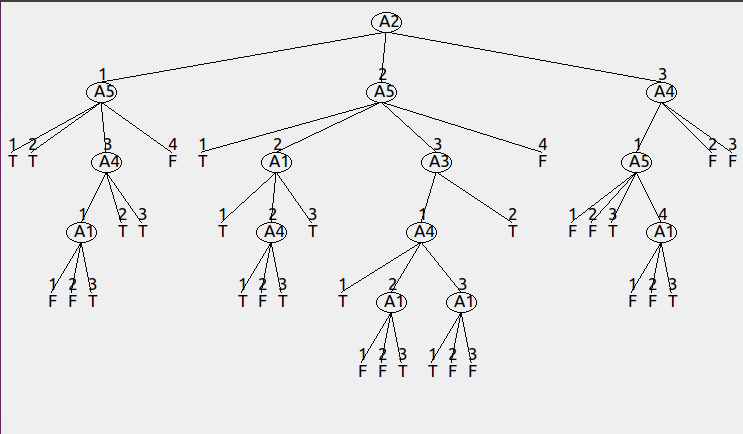

In [111]:
Image(filename =  "Tree3.png")

## Assignment 1: Calculate the entropy in each dataset

In [2]:
list_ = [m.monk1, m.monk2, m.monk3]
for idx,item in enumerate(list_):
    print('The entropy in dataset MONK-', idx +1, 'is', round(entropy(item),4)) 

The entropy in dataset MONK- 1 is 1.0
The entropy in dataset MONK- 2 is 0.9571
The entropy in dataset MONK- 3 is 0.9998


In [ ]:
Monk1 = 62 equal False/True
Monk2 = 105 False, 64 True

## Assignment 2: Low vs High Entropy

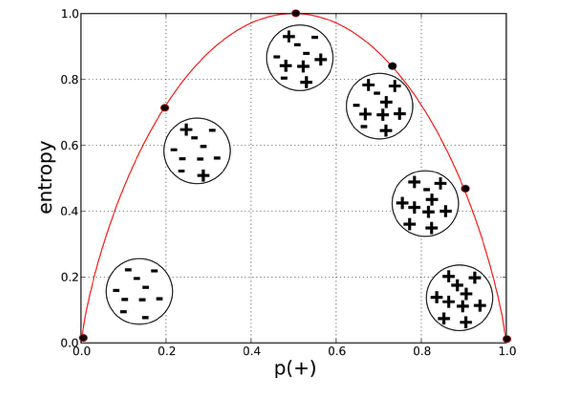

In [3]:
from IPython.display import Image
Image(filename =  "pic1.png")

Entropy is maximized for uniform distributions


Entropy is minimized for distributions that place all their probability on a single outcome

## Assignment 3: 

In [4]:
list_ = [m.attributes[0], m.attributes[1], m.attributes[2],  m.attributes[3],  m.attributes[4],  m.attributes[5]]
for idx,item in enumerate(list_):
    print('The average gain for attribute ', idx +1, 'for dataset Monk-1 is', averageGain(m.monk1,item))

The average gain for attribute  1 for dataset Monk-1 is 0.07527255560831925
The average gain for attribute  2 for dataset Monk-1 is 0.005838429962909286
The average gain for attribute  3 for dataset Monk-1 is 0.00470756661729721
The average gain for attribute  4 for dataset Monk-1 is 0.02631169650768228
The average gain for attribute  5 for dataset Monk-1 is 0.28703074971578435
The average gain for attribute  6 for dataset Monk-1 is 0.0007578557158638421


In [112]:
list_ = [m.attributes[0], m.attributes[1], m.attributes[2],  m.attributes[3],  m.attributes[4],  m.attributes[5]]
for idx,item in enumerate(list_):
    print('The average gain for attribute ', idx +1, 'for dataset Monk-2 is', averageGain(m.monk2,item))

The average gain for attribute  1 for dataset Monk-2 is 0.0037561773775118823
The average gain for attribute  2 for dataset Monk-2 is 0.0024584986660830532
The average gain for attribute  3 for dataset Monk-2 is 0.0010561477158920196
The average gain for attribute  4 for dataset Monk-2 is 0.015664247292643818
The average gain for attribute  5 for dataset Monk-2 is 0.01727717693791797
The average gain for attribute  6 for dataset Monk-2 is 0.006247622236881467


In [113]:
list_ = [m.attributes[0], m.attributes[1], m.attributes[2],  m.attributes[3],  m.attributes[4],  m.attributes[5]]
for idx,item in enumerate(list_):
    print('The average gain for attribute ', idx +1, 'for dataset Monk-3 is', averageGain(m.monk3,item))

The average gain for attribute  1 for dataset Monk-3 is 0.007120868396071844
The average gain for attribute  2 for dataset Monk-3 is 0.29373617350838865
The average gain for attribute  3 for dataset Monk-3 is 0.0008311140445336207
The average gain for attribute  4 for dataset Monk-3 is 0.002891817288654397
The average gain for attribute  5 for dataset Monk-3 is 0.25591172461972755
The average gain for attribute  6 for dataset Monk-3 is 0.007077026074097326


## Assignment 4: 

When the information gain is maximized, the coresponding entropy of the resulting subsets should be minimized.

With a greedy aproach, we want to choose the attribute to split on which will tell us the most about the answer. The information gain is good to use as a heuristic for choosing the attribute, because it values the the entropy of the resulting subsets, and values them according to the distribution of examples per subset. (not good for monk2 though)

Entropy is a good way to measure information gain because it indicates the unpredictability of a dataset. The higher the entropy, the more unpredictable. If we choose the attribute which lowers the entropy of the resulting subsets the most, we effectively increase the predictability of the outcome (True or false here) of the remaining subsets the most, and so gain the most information.

One thing to keep in mind is that in a different sort of problem we could split for example on customer number, which would split everything into groups of 1 and have a maximized information gain, but it wouldnt really tell us anything. To avoid this sort of thing from happening, we should also value the size of the subsets. (see: information gain ratio)

## Assignment 5:

In [122]:
import dtree as d
t1 = d.buildTree(m.monk1, m.attributes)
t2 = d.buildTree(m.monk2, m.attributes)
t3 = d.buildTree(m.monk3, m.attributes)

print(d.check(t2, m.monk2test))


data1 = [d.check(t1, m.monk1), d.check(t1, m.monk1test)]
data2 = [d.check(t2, m.monk2), d.check(t2, m.monk2test)]
data3 = [d.check(t3, m.monk3), d.check(t3, m.monk3test)]


0.6921296296296297


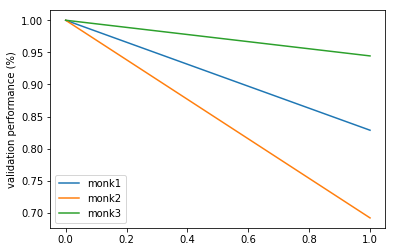

In [132]:
plt.plot(data1, label='monk1')
plt.plot(data2, label = 'monk2')
plt.plot(data3, label = 'monk3')

plt.legend()
plt.ylabel('validation performance (%)')
plt.xlabel('')
plt.show()

In [6]:
from drawtree_qt5 import drawTree
#drawTree(t1)


## Assignment 6

Pruning will lower variance and increase bias. 
It will lower the variance because it get's rid of the less powerful branches, so it lowers the complexity and makes it less dependent on the specific training data set. This will make it more generally applicable and more accurate on different data by reducing overfitting. 
It will however increase bias because the loss of the less powerful branches shifts the average expected prediction and makes the model less accurate.


## Assignment 7

In [8]:
import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]
monk1train, monk1val = partition(m.monk1, 0.8)

In [9]:
monk1train, monk1val = partition(m.monk1, 0.4)
t1 = d.buildTree(monk1train, m.attributes)    
t1_pruned = d.allPruned(t1)
t1_pruned[10]

A5(+A2(-A1(-++)A1(--+))A3(A4(A6(A1(A2(+--)++)-)++)-)A3(-+))

In [10]:
# why tuple index out of range error? and what should I do? 
# In general the performance increases the more I prune, is this true? even to pruning of 15 times etc?
# on the validation set, the best pruning happens in the beginning not the end

In [11]:
def best_split_tree(monk_set, fraction):
    monk1train, monk1val = partition(monk_set, fraction)
    t1 = d.buildTree(monk1train, m.attributes)    
    t1_pruned = d.allPruned(t1)
    list_ = []
    
    try:
        for idx, x in enumerate(range(8), start= 1):
            validation_percentage = d.check(t1_pruned[x], monk1val)
            if idx == 1:
                maximum = validation_percentage
                
            list_.append(validation_percentage)
            
            if maximum <= validation_percentage:
                maximum = validation_percentage
                best_idx = idx
                best_pruned_tree = t1_pruned[x]
                 
    except IndexError:
        pass
    return best_pruned_tree

def new_iteration(new_tree):
    list_ = []
    t1_pruned = d.allPruned(new_tree)
    try:
        for idx, x in enumerate(range(8), start= 1):
            validation_percentage = d.check(t1_pruned[x], monk1val)
            if idx == 1:
                maximum = validation_percentage

            list_.append(validation_percentage)

            if maximum <= validation_percentage:
                maximum = validation_percentage
                best_idx = idx
                best_pruned_tree = t1_pruned[x]

    except IndexError:
        pass
    return best_pruned_tree
    

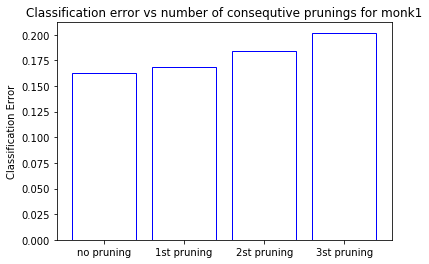

In [105]:
no_prune = []
first_list = []
second_list = []
third_list = []
for x in range(200):
    monk1train, monk1val = partition(m.monk1, 0.6)
    t1 = d.buildTree(monk1train, m.attributes)  
    no = 1 - d.check(t1, m.monk1test)
    no_prune.append(no)
    first_tree = best_split_tree(m.monk1, 0.6)
    new_value = 1 - d.check(first_tree, m.monk1test)
    second_tree = new_iteration(first_tree)
    second_value = 1 -d.check(second_tree, m.monk1test)
    third_tree = new_iteration(second_tree)
    third_value = 1 - d.check(third_tree, m.monk1test)
    
    first_list.append(new_value)
    second_list.append(second_value)
    third_list.append(third_value)
    
height = [statistics.mean(no_prune),statistics.mean(first_list),statistics.mean(second_list),statistics.mean(third_list)]
bars = ('no pruning', '1st pruning', '2st pruning', '3st pruning')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(1.0, 1.0, 1.0),  edgecolor='blue')
plt.xticks(y_pos, bars)
plt.title('Classification error vs number of consequtive prunings for monk1')
plt.ylabel('Classification Error')
plt.show()



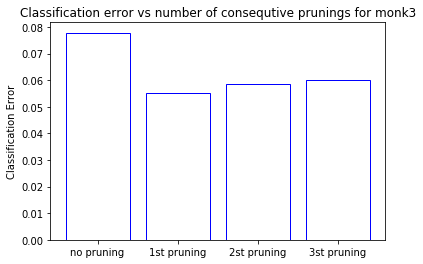

In [133]:
no_prune = []
first_list = []
second_list = []
third_list = []
for x in range(200):
    monk3train, monk3val = partition(m.monk3, 0.6)
    t1 = d.buildTree(monk3train, m.attributes)  
    no = 1 - d.check(t1, m.monk3test)
    no_prune.append(no)
    first_tree = best_split_tree(m.monk3, 0.6)
    new_value = 1 - d.check(first_tree, m.monk3test)
    second_tree = new_iteration(first_tree)
    second_value = 1 -d.check(second_tree, m.monk3test)
    third_tree = new_iteration(second_tree)
    third_value = 1 - d.check(third_tree, m.monk3test)
    
    first_list.append(new_value)
    second_list.append(second_value)
    third_list.append(third_value)
    
height = [statistics.mean(no_prune),statistics.mean(first_list),statistics.mean(second_list),statistics.mean(third_list)]
bars = ('no pruning', '1st pruning', '2st pruning', '3st pruning')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(1.0, 1.0, 1.0),  edgecolor='blue')
plt.xticks(y_pos, bars)
plt.title('Classification error vs number of consequtive prunings for monk3')
plt.ylabel('Classification Error')
plt.show()



In [39]:
final_list = []
for x in range(100):
    new_value = best_split_tree(m.monk1, 0.8)
    final_list.append(new_value)


first_tree = best_split_tree(m.monk1, 0.8)
first_tree
new2 = new_iteration(first_tree)
new3 = new_iteration(new2)
new4 = new_iteration(new3)

print(d.check(first_tree, m.monk1test), d.check(new2, m.monk1test), d.check(new3, m.monk1test), d.check(new4, m.monk1test))

0.8379629629629629 0.8472222222222222 0.8379629629629629 0.8240740740740741


In [13]:
#drawTree(new2)


SystemExit: 0

/home/madis/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
def final_tree(monk_set, fraction):
    monk1train, monk1val = partition(monk_set, fraction)
    t1 = d.buildTree(monk1train, m.attributes)    
    t1_pruned = d.allPruned(t1)
    list_ = []
    
    try:
        for idx, x in enumerate(range(8), start= 1):
            validation_percentage = d.check(t1_pruned[x], monk1val)
            if idx == 1:
                maximum = validation_percentage
                
            list_.append(validation_percentage)
            
            if maximum <= validation_percentage:
                maximum = validation_percentage
                best_idx = idx
                best_pruned_tree = t1_pruned[x]
                 
    except IndexError:
        pass
    return best_pruned_tree


In [15]:
def best_split_tree(monk_set, fraction):
    monk1train, monk1val = partition(monk_set, fraction)
    t1 = d.buildTree(monk1train, m.attributes)    
    t1_pruned = d.allPruned(t1)
    list_ = []
    
    try:
        for idx, x in enumerate(range(8), start= 1):
            validation_percentage = d.check(t1_pruned[x], monk1val)
            if idx == 1:
                maximum = validation_percentage
                
            list_.append(validation_percentage)
            
            if maximum <= validation_percentage:
                maximum = validation_percentage
                best_idx = idx
                best_pruned_tree = t1_pruned[x]
                 
    except IndexError:
        pass
    return best_pruned_tree


ay = best_split_tree(m.monk1, 0.2)


d.check(ay, m.monk1test)
final_list = []
for x in range(100):
    new_value = d.check(ay, m.monk1test)
    final_list.append(new_value)

    

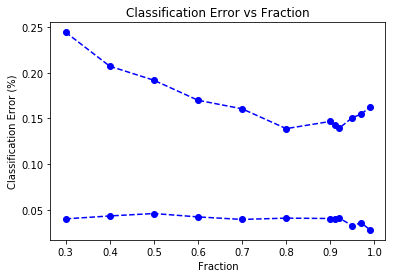

In [146]:
def final_graph(range_value, fraction ):
    final_list = []
    val_list = []
    for x in range(range_value):
        monk1train, monk1val = partition(m.monk1, fraction)

        ay = best_split_tree(m.monk1, fraction)
        new_value = 1 - d.check(ay, m.monk1test)
        final_list.append(new_value)
        
        val_value = 1 - d.check(ay, monk1val)
        val_list.append(val_value)
        
        
        
    return statistics.mean(final_list) , statistics.stdev(final_list)

fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.91,0.92,0.95,0.97,0.99]
number_list = [final_graph(100, x) for x in fraction]
#number_list1 = [best_split(m.monk1, x) for x in fraction]

plt.plot(fraction, number_list, 'bo--')#, label='test_loss')
#plt.plot( fraction, number_list1, marker='', color='olive', linewidth=2, linestyle='dashed', label="validation_loss")
#plt.legend()
plt.title('Classification Error vs Fraction')
plt.ylabel('Classification Error (%)')
plt.xlabel('Fraction')
plt.show()

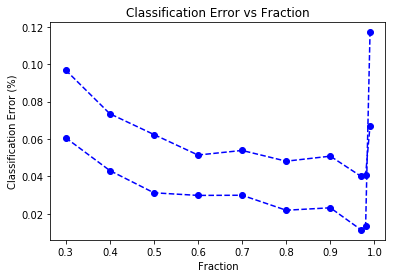

In [141]:
def final_graph(range_value, fraction ):
    final_list = []
    val_list = []
    for x in range(range_value):
        monk3train, monk3val = partition(m.monk3, fraction)

        ay = best_split_tree(m.monk3, fraction)
        new_value = 1 - d.check(ay, m.monk3test)
        final_list.append(new_value)
        
        val_value = 1 - d.check(ay, monk3val)
        val_list.append(val_value)
        
        
        
    return statistics.mean(final_list), statistics.stdev(final_list)

fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.97, 0.98, 0.99]
number_list_ = [final_graph(100, x) for x in fraction]
#number_list1 = [best_split(m.monk1, x) for x in fraction]

plt.plot(fraction, number_list_, 'bo--')#, label='test_loss')
#plt.plot( fraction, number_list1, marker='', color='olive', linewidth=2, linestyle='dashed', label="validation_loss")
#plt.legend()
plt.title('Classification Error vs Fraction')
plt.ylabel('Classification Error (%)')
plt.xlabel('Fraction')
plt.show()

## Extra

In [ ]:
def best_split(monk_set, fraction):
    monk1train, monk1val = partition(monk_set, fraction)
    t1 = d.buildTree(monk1train, m.attributes)    
    t1_pruned = d.allPruned(t1)
    list_ = []
    
    try:
        for idx, x in enumerate(range(10), start= 1):
            validation_percentage = d.check(t1_pruned[x], monk1val)
            if idx == 1:
                maximum = validation_percentage
                
            list_.append(validation_percentage)
            
            if maximum <= validation_percentage:
                maximum = validation_percentage
                best_idx = idx
                best_pruned_tree = t1_pruned[x]
                 
    except IndexError:
        pass
    return   maximum

#print( best_split(m.monk1, 0.8))    
      
fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
number_list1 = [best_split(m.monk1, x) for x in fraction]
print(number_list1)

plt.plot(fraction, (number_list1))
plt.ylabel('validation performance (%)')
plt.xlabel('train-test split (%)')
plt.show()

In [ ]:
monk1train, monk1val = partition(m.monk1, 0.2)
t1 = d.buildTree(monk1train, m.attributes)    
#t1_pruned = d.allPruned(t1)

t1_pruned

from drawtree_qt5 import drawTree
drawTree(t1_pruned[3])

In [ ]:
def best_split(monk_set, fraction):
    monk1train, monk1val = partition(monk_set, fraction)
    t1 = d.buildTree(monk1train, m.attributes)    
    t1_pruned = d.allPruned(t1)
    list_ = []
    
    try:
        for idx, x in enumerate(range(10), start= 1):
            validation_percentage = d.check(t1_pruned[x], monk1val)
            if idx < 4:
                list_.append(validation_percentage)
                
            #elif round(np.mean(list_),4) < validation_percentage:
            #    break
            else:
                list_.append(validation_percentage)
    except IndexError:
        pass
    return list_, np.mean(list_) #statistics.mean([idx-2,idx-1, idx])
    #return round(max(list_),4), round(validation_percentage,4)


print( best_split(m.monk1, 0.8))
      
      
fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
number_list = [best_split(m.monk1, x) for x in fraction]
#print(number_list)


#plt.plot(fraction, number_list)
#plt.ylabel('validation performance (%)')
#plt.xlabel('train-test split (%)')
#plt.show()

In [ ]:
stats = [2,3]
print(statistics.mean(stats))

In [ ]:
import statistics 

stats = []
for l in range(2):
    number_list = [best_split(m.monk1, x) for x in fraction]
    stats.append(number_list)
    print(stats)
    
    

#statistics.mean(number_list)

In [ ]:
monk1train, monk1val = partition(m.monk1, 0.6)
t1 = d.buildTree(monk1train, m.attributes)    
t1_pruned = d.allPruned(t1)[6]

d.check(t1_pruned, m.monk1test)

In [ ]:
number_list = [best_split(m.monk1, x) for x in fraction]
print(number_list)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(fraction, number_list)
plt.ylabel('validation performance')
plt.xlabel('train-test split')
plt.show()

In [ ]:
t1_pruned[2]

In [ ]:
d.allPruned(t1)[]

In [ ]:
d.select(dataset=m.monk1,attribute=m.attributes[0],value=1)